In [1]:
!pip install bing-image-downloader


In [3]:
!mkdir images


mkdir: cannot create directory ‘images’: File exists


In [4]:
from bing_image_downloader import downloader
downloader.download("sunflower",limit=30,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://papeldeparede.club/wp-content/uploads/2019/12/papeis-de-parede-de-girassol-9.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.monadnockart.com/images/tutorials/fireflies.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/c6/1b/18/c61b1856ff76e6d82a43b7ed8d104b32.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.monadnockart.com/images/tutorials/sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdwallpapers.in/download/pure_yellow_sunflowers-1280x800.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://fsa.zobj.net/crop.php?r=-oE-wA-l9-Z3knzAPi6yFsRZFkxhQ9QjQxegu-W0MSuhIg2hudCrMpLlTZ5bLGQJf_Vw77-4xWOk_GJsQ8Ayw2nMeO0dMrAsJkvlWvtL2HNdUk9TmJ9JFIpP7ItvZIvdtmSt0JwgDZmZLYpz
[%] File Downloaded !

[%] Downloading Image #7 from https://nnew.cc/wp-content/uploads/2018/02/1392-8.jpg
[%] File 

In [5]:
downloader.download("rugby ball leather",limit=30,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.freevector.com/uploads/vector/preview/16532/FreeVector-Rugby-Ball.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.cgstudio.com/imgd/l/76/58aaf6dca70248a0408b4567/rugby_ball_gilbert_01.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.paginainizio.com/genio/foto/rugby1932.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://static.vecteezy.com/system/resources/previews/000/436/969/original/vector-football-or-rugby-ball-emblem.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.allsportvintage.com/912-thickbox_default/vintage-leather-foot-ball.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://cdn.instructables.com/FTK/A64C/FS8O1JNS/FTKA64CFS8O1JNS.RECT2100.jpg
[!] Issue getting: http://cdn.instructables.com/FTK/A64C/FS8O1JNS/FTKA64CFS8O1JNS.RECT2100.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading I

In [6]:
downloader.download("cat",limit=30,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-RD49_bQoKgM/Tsc6ZfSqGVI/AAAAAAAABcE/LIhF0xYcYjI/s1600/cat-wallpapers-Desktop-HD-photo-images-14.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://i1.ytimg.com/vi/f5m8Xdwt8Jk/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.toxel.com/wp-content/uploads/2013/04/catstockings02.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://d.ibtimes.co.uk/en/full/1362635/lykoi-cat.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i1.ytimg.com/vi/lHCgbUdYVqI/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.petpaw.com.au/wp-content/uploads/2012/11/Calico-lying.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://1.bp.blogspot.com/-x0Tib7A1pWM/T_EXljOcfeI/AAAAAAAAECw/u9q77BqiU2Y/s1600/Mog+the+forgetful+cat.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://www.th

In [7]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/images'
CATEGORIES=['sunflower','rugby ball leather','cat']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

<BarContainer object of 3 artists>

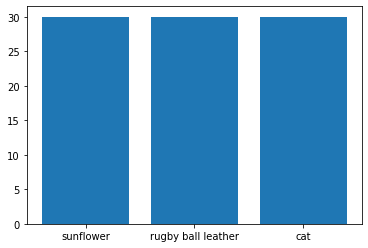

In [8]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [10]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
y_pred=clf.predict(x_test)
y_pred

array([1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 0, 0, 0, 1])

In [13]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
accuracy_score(y_pred,y_test)

0.6666666666666666

In [16]:
confusion_matrix(y_pred,y_test)

array([[3, 0, 0],
       [0, 8, 1],
       [5, 3, 7]])

In [17]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))

Enter URLhttps://image.cnbcfm.com/api/v1/image/105828578-1554223245858gettyimages-149052633.jpeg?v=1554223281.jpg
(2000, 3002, 3)
predicted output: cat


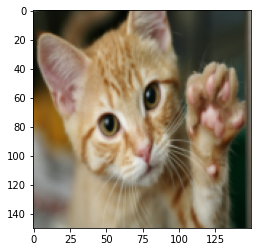

In [18]:
#testing brand new image
flat_data=[]
url=input('Enter URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'predicted output: {y_out}')